In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
# importing the data
visual=pd.read_csv('SalesData.csv')
visual.head(3)

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29


In [9]:
# check the datatype
visual.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3709 entries, 0 to 3708
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AccountId           3709 non-null   int64  
 1   AccountName         3709 non-null   object 
 2   Region              3709 non-null   object 
 3   Division            3709 non-null   object 
 4   City                3709 non-null   object 
 5   State               3709 non-null   object 
 6   Tier                3709 non-null   object 
 7   Month               3709 non-null   object 
 8   Sales2015           3709 non-null   float64
 9   Sales2016           3709 non-null   float64
 10  Units2015           3709 non-null   float64
 11  Units2016           3709 non-null   float64
 12  TargetAchevied2015  3709 non-null   float64
 13  TargetAchevied2016  3709 non-null   float64
dtypes: float64(6), int64(1), object(7)
memory usage: 405.8+ KB


### Compare Sales by region for 2016 with 2015 using bar chart

C:\Users\Sarita\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


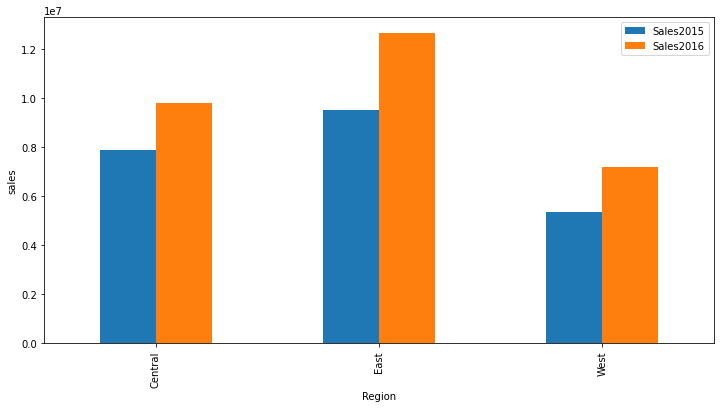

In [14]:
visual.groupby('Region')['Sales2015','Sales2016'].sum().plot(kind='bar',figsize=(12,6))
plt.ylabel('sales')
plt.show()

In [16]:
visual.plot?

#### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.


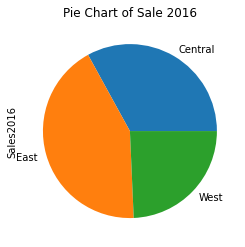

In [17]:
visual.groupby('Region').Sales2016.sum().plot(title='Pie Chart of Sale 2016',kind='pie')
plt.show()

#### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

C:\Users\Sarita\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


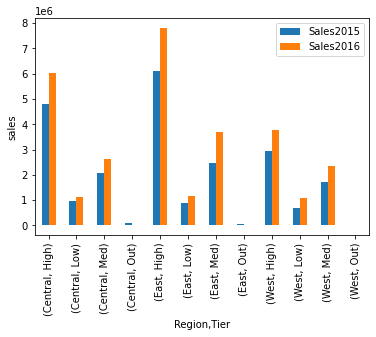

In [18]:
visual.groupby(['Region','Tier'])['Sales2015','Sales2016'].sum().plot(kind='bar')
plt.ylabel('sales')
plt.show()

#### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [19]:
visual.groupby(visual.Region=='East',State).aggregate({'Sales2015':['sum'],'Sales2016':['sum']}).plot(kind='bar')

NameError: name 'State' is not defined

### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?


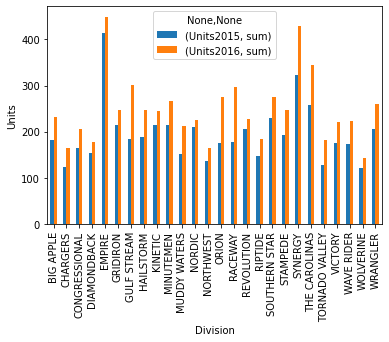

In [20]:
s1=visual.loc[(visual.Tier=="High")].groupby(['Division']).aggregate({'Units2015':['sum'],'Units2016':['sum']})
s1.plot(kind="bar")
plt.ylabel("Units")
plt.show()

### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as -
• Jan - Mar : Q1
• Apr - Jun : Q2
• Jul - Sep : Q3
• Oct - Dec : Q4 

In [21]:
visual.loc[(visual.Month=='Jan') |(visual.Month=='Feb')|(visual.Month=='March'),'Qtr']='Q1'
visual.loc[(visual.Month=='Apr') |(visual.Month=='May')|(visual.Month=='Jun'),'Qtr']='Q2'
visual.loc[(visual.Month=='Jul') |(visual.Month=='Aug')|(visual.Month=='Sep'),'Qtr']='Q3'
visual.loc[(visual.Month=='Oct') |(visual.Month=='Nov')|(visual.Month=='Dec'),'Qtr']='Q4'
visual

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,NaN
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14,Q1
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11,Q3
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55,Q4
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48,Q1


### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

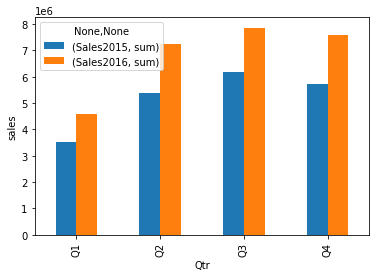

In [22]:
visual.groupby("Qtr").agg({"Sales2015":['sum'],"Sales2016":['sum']}).plot(kind='bar')
plt.ylabel('sales')
plt.show()

### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.


<AxesSubplot:ylabel='Sales2016'>

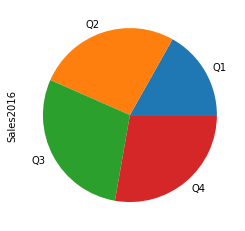

In [26]:
pi=visual.groupby(['Qtr'])['Sales2016'].sum()
pi.plot(kind='pie')